# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane drugs have been used to treat the highest number of mice.
- A good ratio of Male and Female mice have been included
- The Correlation between mouse weight and average tumor volume is 0.84 using Capomulin drug treatment, which indicates a Strong Positive correlation between the variables. This means when mouse weight increases the average tumor volume tends to increase as well and viceversa. But this does not mean causation.It is not meant to say that the mouse weight causes changes in tumor volume or viceversa.  It only indicates there is a consistent relationship between Weight and average tumor volume. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_results= pd.merge(study_results,mouse_metadata, how ="left", on ='Mouse ID')

# Display the data table for preview
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice= len(mouse_study_results["Mouse ID"].unique())
number_mice

249

In [3]:
numbermice=mouse_study_results.nunique()
numbermice

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [4]:
duplicated_data = mouse_study_results[mouse_study_results.duplicated(subset=['Mouse ID','Timepoint'])]
duplicated_data["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data= mouse_study_results[mouse_study_results.duplicated(["Mouse ID", "Timepoint"])]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#Create a clean data frame dropping the duplicate mouse id
dropped_df= mouse_study_results[mouse_study_results['Mouse ID']!= "g989"]
dropped_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
new_clean_df= dropped_df['Mouse ID'].nunique()
new_clean_df

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_regimen = dropped_df["Tumor Volume (mm3)"].groupby(dropped_df["Drug Regimen"]).mean()
median_regimen = dropped_df["Tumor Volume (mm3)"].groupby(dropped_df["Drug Regimen"]).median()
var_regimen = dropped_df["Tumor Volume (mm3)"].groupby(dropped_df["Drug Regimen"]).var()
stdev_regimen = dropped_df["Tumor Volume (mm3)"].groupby(dropped_df["Drug Regimen"]).std()
sem_regimen = dropped_df["Tumor Volume (mm3)"].groupby(dropped_df["Drug Regimen"]).sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df= pd.DataFrame({"Mean Tumor Volume" : mean_regimen,"Median Tumor Volume": median_regimen, "Tumor Volume Variance": var_regimen,"Tumor Volume Std. Dev.":stdev_regimen,"Tumor Volume Std.Err.":sem_regimen})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group= dropped_df.groupby("Drug Regimen")
mean_regimen = regimen_group["Tumor Volume (mm3)"].mean()
median_regimen = regimen_group["Tumor Volume (mm3)"].median()
var_regimen = regimen_group["Tumor Volume (mm3)"].var()
stdev_regimen = regimen_group["Tumor Volume (mm3)"].std()
sem_regimen = regimen_group["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df= pd.DataFrame({"Mean Tumor Volume" : mean_regimen,"Median Tumor Volume": median_regimen, "Tumor Volume Variance": var_regimen,"Tumor Volume Std. Dev.":stdev_regimen,"Tumor Volume Std.Err.":sem_regimen})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggre= dropped_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean','median','var','std','sem'])
summary_aggre

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

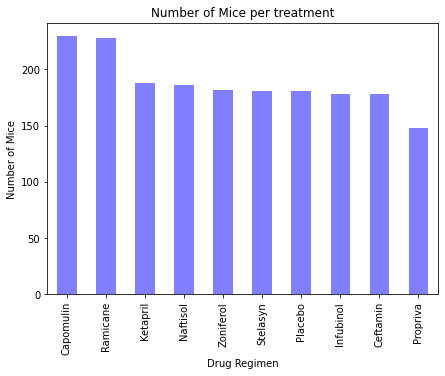

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_drugregimen= dropped_df["Drug Regimen"].value_counts()
count_drugregimen.plot(kind='bar',color='b',alpha=0.5,figsize=(7,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per treatment")
plt.show()

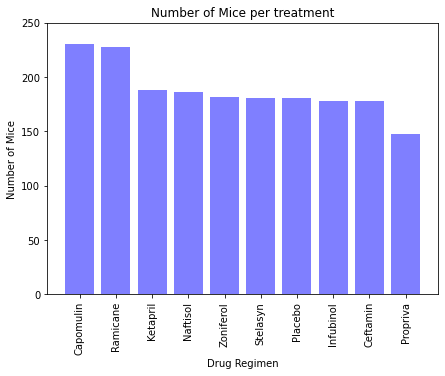

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(count_drugregimen))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(7,5))
plt.bar(x_axis, count_drugregimen.values, color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per treatment")
plt.xticks(tick_locations,count_drugregimen.index.values,rotation='vertical')
plt.ylim(0,250)
plt.show()

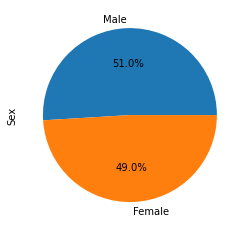

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distrib= dropped_df["Sex"].value_counts()
gender_distrib.plot(kind='pie',autopct= "%1.1f%%")
plt.show()

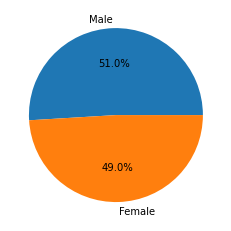

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender=['Male','Female']
plt.pie(gender_distrib,labels=gender, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
list_drugs=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
timepoint_last= dropped_df.groupby("Mouse ID")
timepoint_last= timepoint_last["Timepoint"].max()
timepoint_df= pd.DataFrame(timepoint_last)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_df= pd.merge(timepoint_df,dropped_df,on= ["Mouse ID", "Timepoint"])
tumor_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
list_drugs=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
Cap_tumor_vol= []
Rami_tumor_vol= []
Infu_tumor_vol= []
Cefta_tumor_vol= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(len(tumor_vol_df)-1):
    if tumor_vol_df.loc[x,"Drug Regimen"] =="Capomulin":
        Cap_tumor_vol.append(tumor_vol_df.loc[x,"Tumor Volume (mm3)"])
    if tumor_vol_df.loc[x,"Drug Regimen"] =="Ramicane": 
        Rami_tumor_vol.append(tumor_vol_df.loc[x,"Tumor Volume (mm3)"])
    if tumor_vol_df.loc[x,"Drug Regimen"] =="Infubinol":
        Infu_tumor_vol.append(tumor_vol_df.loc[x,"Tumor Volume (mm3)"])  
    if tumor_vol_df.loc[x,"Drug Regimen"] =="Ceftamin":
        Cefta_tumor_vol.append(tumor_vol_df.loc[x,"Tumor Volume (mm3)"])
tumor_volume= [Cap_tumor_vol,Rami_tumor_vol,Infu_tumor_vol,Cefta_tumor_vol]
list_outliers=[]
for i in range(len(tumor_volume)):
    quartiles=pd.Series(tumor_volume[i]).quantile([.25,.5,.75])
    lowerq= quartiles[0.25]
    upperq= quartiles[0.75]
    iqr=upperq-lowerq
    print(f"\n{list_drugs[i]}:")
    print(f"The Lower Quartile of tumor volume is :{lowerq}")
    print(f"The Upper Quartile of tumor volume is :{upperq}")
    print(f"The InterQuartile of tumor volume is :{iqr}")
    print(f"The Median tumor volume is :{quartiles[0.5]}")
    lower_bound =lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} and above {upper_bound} could be outliers")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    for j in range(len(tumor_volume[i])):
        if (tumor_volume[i][j] < lower_bound) or (tumor_volume[i][j] > upper_bound):
            outlier = tumor_volume[i][j]
            list_outliers.append(outlier)
            print(f"The outliers are {list_outliers}.")
            
            


Capomulin:
The Lower Quartile of tumor volume is :32.37735684
The Upper Quartile of tumor volume is :40.1592203
The InterQuartile of tumor volume is :7.781863460000004
The Median tumor volume is :38.1251644
Values below 20.70456164999999 and above 51.83201549 could be outliers

Ramicane:
The Lower Quartile of tumor volume is :31.56046955
The Upper Quartile of tumor volume is :40.65900627
The InterQuartile of tumor volume is :9.098536719999998
The Median tumor volume is :36.56165229
Values below 17.912664470000003 and above 54.30681135 could be outliers

Infubinol:
The Lower Quartile of tumor volume is :54.04860769
The Upper Quartile of tumor volume is :65.52574285
The InterQuartile of tumor volume is :11.477135160000003
The Median tumor volume is :60.16518046
Values below 36.83290494999999 and above 82.74144559000001 could be outliers
The outliers are [36.3213458].

Ceftamin:
The Lower Quartile of tumor volume is :48.72207785
The Upper Quartile of tumor volume is :64.29983003
The Inte

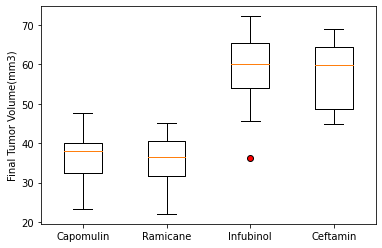

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1=plt.subplots()
ax1.set_ylabel("Final Tumor Volume(mm3)")
props= dict(marker= "o", markerfacecolor="r")
ax1.boxplot(tumor_volume,flierprops=props)
ax1.set_xticklabels(list_drugs)
plt.show()

## Line and Scatter Plots

In [20]:
tumor_vol_df.loc[tumor_vol_df["Drug Regimen"]== "Capomulin"].head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


In [21]:
l509=mouse_study_results[mouse_study_results["Mouse ID"]== "l509"]
l509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


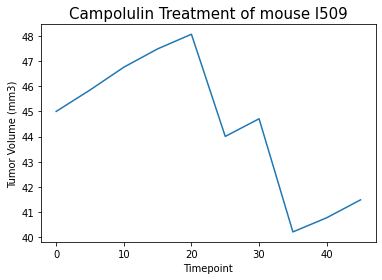

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(l509["Timepoint"],l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Campolulin Treatment of mouse l509", fontsize=15)
plt.figsize=(60,40)
plt.show()

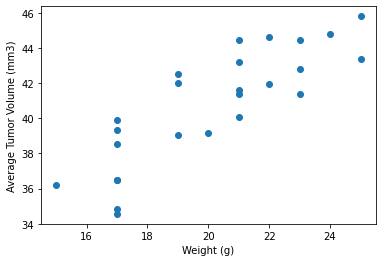

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = mouse_study_results.loc[mouse_study_results["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
average_tumor_cap = capomulin_regimen["Tumor Volume (mm3)"].mean()
weight_mouse = capomulin_regimen["Weight (g)"].unique()
plt.scatter(weight_mouse, average_tumor_cap)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The Correlation between the mouse weight and the average tumor volume is 0.84


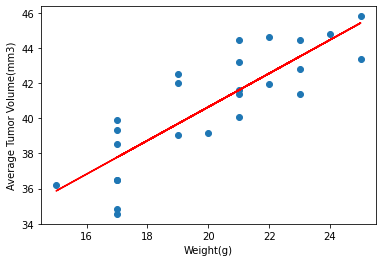

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_mouse =weight_mouse.astype(float)
correlation=st.pearsonr(weight_mouse,average_tumor_cap)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_mouse,average_tumor_cap)
regress_values = weight_mouse * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_mouse,average_tumor_cap)
plt.plot(weight_mouse,regress_values,"-", color='r')
print(f"The Correlation between the mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.show()